In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [43]:
class LogisticRegression:
    
    def __init__(self):
        pass
    
    def score(self, X, y):
        return np.sum((y == np.transpose(self.guess)))/(X.shape[0])
    
    def predict(self, X, w):
        self.guess = (np.dot(X, w) >= 0).astype(int)
        return self.guess
        
    def fit(self, X, y):
        self.loss_history = []
        self.score_history = []
        w = np.random.rand(2,1)
        bias = np.random.uniform(0,1)
        self.w_ = np.append(w, -bias)
        self.X_ = np.append(X, np.ones((X.shape[0], 1)), 1)
        
    def sigmoid(self, z):
        return 1 / (1+ np.exp(-z))
    
    def logistic_loss(self, y_hat, y):
        return -y*np.log(self.sigmoid(y_hat)) - (1-y)*np.log(1-self.sigmoid(y_hat))
    
    def empirical_risk(self, X, y, loss, w):
        y_hat = self.predict(X, w)
        return loss(y_hat, y).mean()
    
    def gradient(self, w, X, y):
        w = w.reshape(3,1)
        sigdot = (np.dot(X, w) >= 0).astype(int)
        return np.sum(np.multiply(X,(self.sigmoid(sigdot) - y.reshape(len(y),1))))
    
    def fit_stochastic(self, X, y):
        prev_loss = np.inf
        self.loss_history = []
        self.score_history = []
        w = np.random.rand(2,1)
        bias = np.random.uniform(0,1)
        self.w_ = np.append(w, -bias)
        self.X_ = np.append(X, np.ones((X.shape[0], 1)), 1)
        
        n = X.shape[0]
        for j in np.arange(m_epochs):
            
            order = np.arange(n)
            np.random.shuffle(order)

            for batch in np.array_split(order, n // batch_size + 1):
                x_batch = self.X_[batch,:]
                y_batch = y[batch]
                grad = self.gradient(self.w_, x_batch, y_batch) 
                self.w_ -= alpha*grad                      
            new_loss = self.empirical_risk(self.X_, y, self.logistic_loss, self.w_)
            self.loss_history.append(new_loss)
            self.currentscore = self.score(LR.X_, y)
            self.score_history.append(self.score)
    
            if np.isclose(new_loss, prev_loss):          
                break
            else:
                prev_loss = new_loss
        

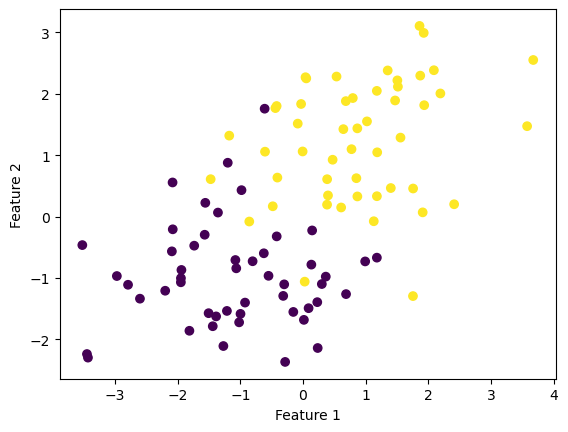

In [2]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from logisticregression import LogisticRegression

p_features = 3

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

In [3]:
LR = LogisticRegression()  
alpha = 0.001
prev_loss = np.inf
LR.fit(X, y)
for i in range(1000):
    LR.w_ -= alpha*LR.gradient(LR.w_, LR.X_, y)                      
    new_loss = LR.empirical_risk(LR.X_, y, LR.logistic_loss, LR.w_)
    LR.loss_history.append(new_loss)
    score = LR.score(LR.X_, y)
    LR.score_history.append(score)
    
    if np.isclose(new_loss, prev_loss):          
        break
    else:
        prev_loss = new_loss
    
print("final score: " + str(score))

final score: 0.85


In [13]:
LR = LogisticRegression()

m_epochs = 10000000
alpha = 0.001
batch_size = 5

LR.fit_stochastic(X, y, m_epochs, alpha, batch_size)
print("Final Score: " + str(LR.score(LR.X_, y)))

3
Final Score: 0.85


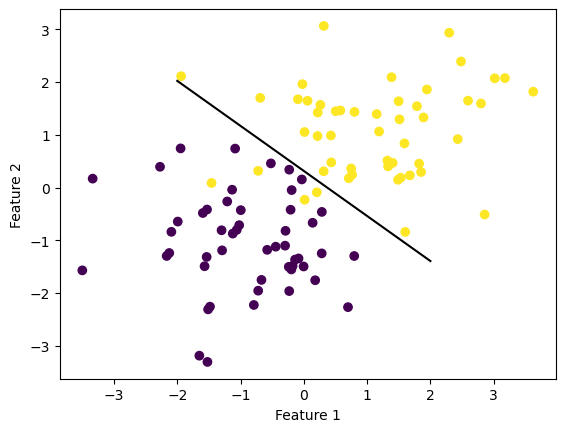

In [129]:
def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
draw_line(LR.w_, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

In [ ]:
n = X.shape[0]
for j in np.arange(m_epochs):
            
    order = np.arange(n)
    np.random.shuffle(order)

    for batch in np.array_split(order, n // batch_size + 1):
        x_batch = X[batch,:]
        y_batch = y[batch]
        grad = gradient(w, x_batch, y_batch) 

In [24]:
from logisticregression import LogisticRegression
LR = LogisticRegression()

m_epochs = 100
alpha = 0.001

LR.fit2(X, y, m_epochs, alpha)
print("Final Score: " + str(LR.score(LR.X_, y)))

4
Final Score: 0.85


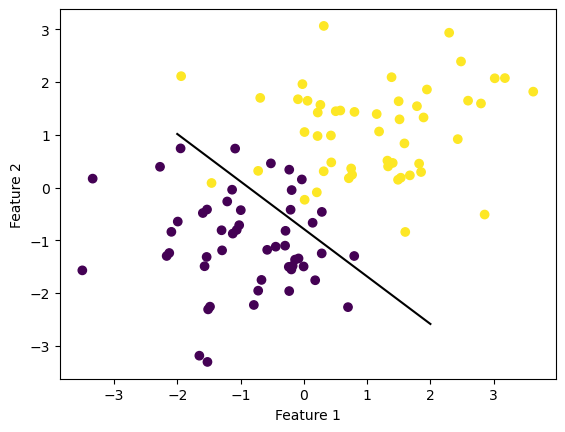

In [188]:
fig = plt.scatter(X[:,0], X[:,1], c = y)
draw_line(LR.w_, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

In [20]:
stochastic_arr = []
LR = LogisticRegression()
for i in range(1000):
    m_epochs = 10000000
    alpha = 0.001
    batch_size = 20
    LR.fit_stochastic(X, y, m_epochs, alpha, batch_size)
    stochastic_arr.append(LR.stop)
print(sum(stochastic_arr)/1000)

3.91


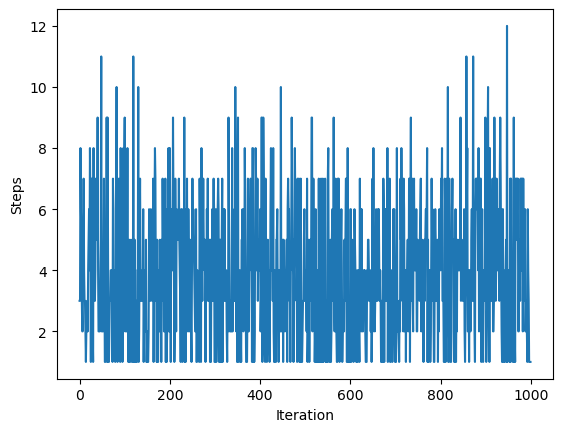

In [22]:
fig = plt.plot(stochastic_arr)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Steps")

In [19]:
gradient_arr = []
LR = LogisticRegression()
for i in range(1000):
    m_epochs = 10000000
    alpha = 0.001
    batch_size = 5
    LR.fit2(X, y, m_epochs, alpha)
    gradient_arr.append(LR.stop)
print(sum(gradient_arr)/1000)

3.946


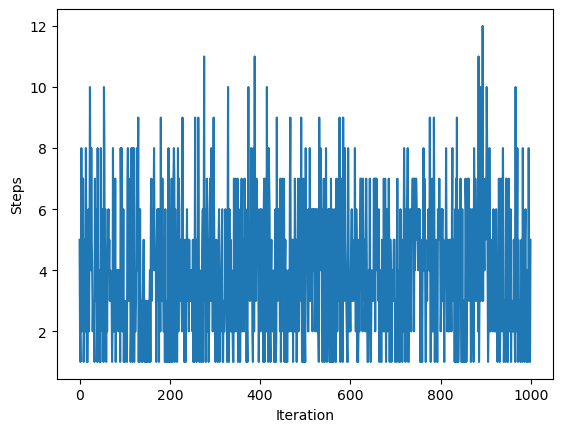

In [21]:
fig = plt.plot(gradient_arr)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Steps")